## Study List
#### 1. 1st order Newton Raphson Method  (https://www.youtube.com/watch?v=28BMpgxn_Ec)
#### 2. 2nd order Newton Raphson Method and Taylor's Theorem (https://www.youtube.com/watch?v=42zJ5xrdOqo)
#### 3. Understand Backtracking line search
#### 4. Understand Gradient Descent

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Backtracking Line Search Algorithm

In [2]:
def backtracking_line_search(x0, f, deltaX, df0, alpha=0.1, beta=0.7):
    t = 1.
    f0 = f(x0)
    while f(x0+t*deltaX) > f0+alpha*t*(df0.dot(deltaX)):
          t = t * beta
    return t

## Gradient Descent and Newton Raphson method

In [3]:
def gradient_descent(x0, f, df, max_n=1000, tol=10e-7):
    x_steps = np.empty([max_n+1, x0.size]) #allocate space for the sequence
    x_steps[0, :] = x0
    x_current = x0.copy()
    for i in range(max_n):
        df_current = df(x_current)
        deltaX = -df_current
        line_search = backtracking_line_search(x_current, f, deltaX, df_current)
        x_current += line_search * deltaX
        x_steps[i+1,:] = x_current

        if np.linalg.norm(x_steps[i,:]-x_current) < tol: #there was no improvement
            break
    if i !=max_n-1:
        print("Reached the maximum number of iterations before convergence")
        
    return x_steps[:i+1,:]

def newton_raphson(x0, f, df, y, max_n=1000, tol=10e-7):
    x_steps = np.empty([max_n+1, x0.size])
    x_steps[0, :] = x0
    x_current = x0.copy()
    for i in range(max_n):
        y_current = y(x_current) # compute Newton Step
        deltaX = -y_current      # -Newton Step = deltaX
        df_current = df(x_current) # current g
        decrement = df_current.dot(y_current)  # compute decrement g.dot(y)
        
        # Stopping Criterion
        if decrement / 2 < tol:
            break
        # Line search : Need to understand and check decrement is right or not
        line_search = backtracking_line_search(x_current, f, deltaX, df_current) 
        # Update
        x_current += line_search * deltaX
        x_steps[i+1, :] = x_current
    
    if i !=max_n-1:
        print("Reached the maximum number of iterations before convergence")
        
    return x_steps[:i+1,:]        

In [4]:
def plot_descent1D(x_steps, x, f):
    plt.figure()

    plt.plot(x, f(x), linewidth=2)

    for point in x_steps:
        plt.plot(point, f(point), 'x', markersize=10, markeredgewidth=4)
    plt.xlabel('x')
    plt.ylabel('f(x)')    
        
        
def plot_descent2D(x_steps, x_bounds, y_bounds, f, norm_scale=matplotlib.colors.Normalize()):
    plt.figure()
    
    t1 = np.linspace(x_bounds[0], x_bounds[1], 100)
    t2 = np.linspace(y_bounds[0], y_bounds[1], 100)
    tX, tY = np.meshgrid(t1, t2)
    
    f_eval = np.empty_like(tX)
    
    it = np.nditer(tX, flags=['multi_index'])
    while not it.finished:
        f_eval[it.multi_index] = f(np.array([tX[it.multi_index], tY[it.multi_index]]))
        it.iternext()
    
    plt.contourf(tX, tY, f_eval, alpha=.75, cmap='jet', norm=norm_scale)

    plt.plot(x_steps[:,0], x_steps[:,1], '-kx', markersize=10, markeredgewidth=4, linewidth=4)


def compare_convergence(x_steps, p0, fig=None):
    if fig==None:
        fig = plt.figure()
    else:
        plt.figure(fig.number)
        
    rel_error = x_steps - p0
    plt.semilogy(range(len(x_steps[:,0])),np.linalg.norm(rel_error, axis=1))
    plt.xlabel('Number of iterations')
    plt.ylabel('Relative distance to p0')
    return fig

Reached the maximum number of iterations before convergence
Reached the maximum number of iterations before convergence
Implemented Newton's Method and computed funtion's minimum= 1.0000000321720988


<IPython.core.display.Javascript object>


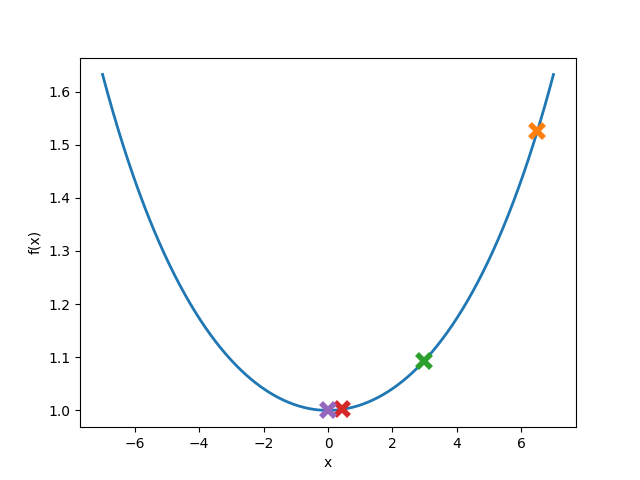

<IPython.core.display.Javascript object>


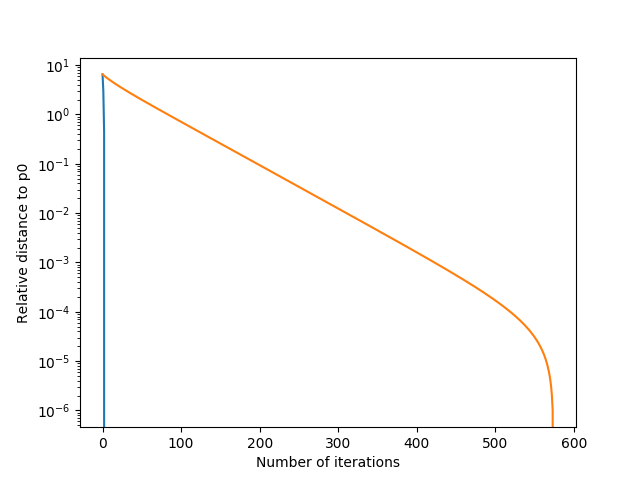

In [5]:
f = lambda x: np.exp(x**2 / 100.)
df = lambda x: (x/50.)*np.exp(x**2 / 100.) 
# Solved Hy = g for y, where df2 = H = lambda x: (1/50.)*np.exp(x**2 / 100.) + x**2 / 50**2 * np.exp(x**2 / 100.)
y = lambda x: (50.*x) / (50. + x**2)

x0 = np.array([6.5])
x_steps_grad = gradient_descent(x0, f, df)
x_steps = newton_raphson(x0, f, df, y)
print("Implemented Newton's Method and computed funtion's minimum=", f(x_steps[-1]).min())
# we  want to plot results from x=-10 to x=10
x = np.arange(-7.,7.,0.001)
# plot results
plot_descent1D(x_steps, x, f)
fig = compare_convergence(x_steps, x_steps[-1,:])
fig = compare_convergence(x_steps_grad, x_steps_grad[-1,:], fig)

Reached the maximum number of iterations before convergence
Reached the maximum number of iterations before convergence
Implemented Newton's Method for 2D space and computed funtion's minimum= 0.0


<IPython.core.display.Javascript object>


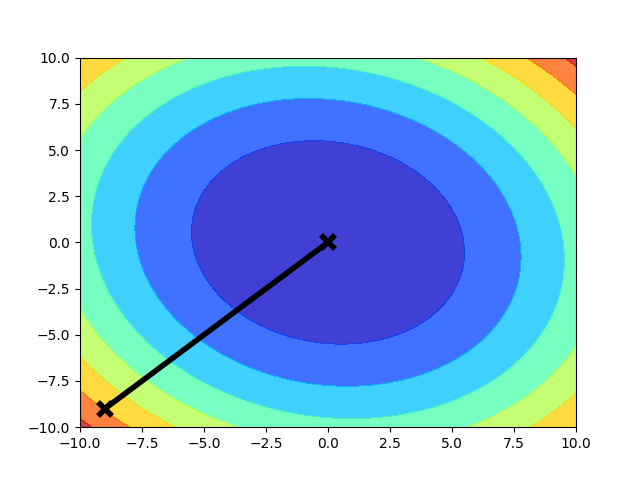

<IPython.core.display.Javascript object>


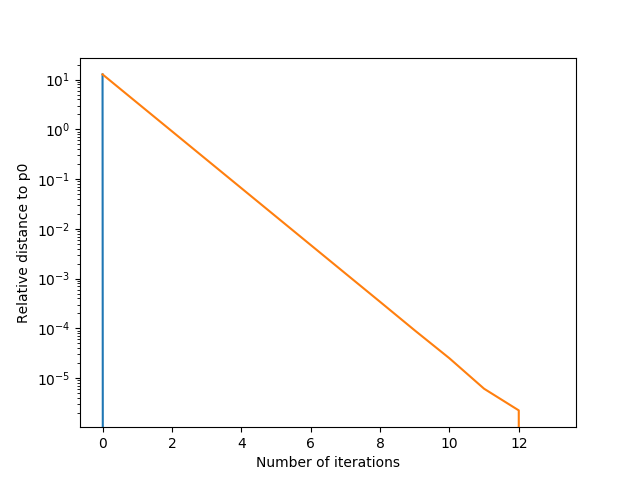

In [6]:
f = lambda x: x.dot(np.array([[10,1],[1,10]])).dot(x) # lambda function defining f(x)
df = lambda x: np.array([[20,2],[2,20]]).dot(x) # lambda function defining df/dx
y = lambda x: x

# initial 2D point from which we optimize
x0 = np.array([-9., -9.])        
       
# gradient descent    
x_steps = newton_raphson(x0, f, df, y)
x_steps_grads = gradient_descent(x0, f, df) 
print("Implemented Newton's Method for 2D space and computed funtion's minimum=", f(x_steps[-1]).min())
# we plot the results in a [-10,10]x[-10,10] box
plot_descent2D(x_steps, [-10., 10.], [-10., 10.], f)
fig = compare_convergence(x_steps, x_steps[-1,:])
fig = compare_convergence(x_steps_grads, x_steps_grads[-1,:],fig)